# Plotting some figures 

In [2]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.patches as patches

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')
sys.path.insert(0, '../')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [3]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':10,
    'ytick.labelsize':10,
    'axes.labelsize':11,
})

In [4]:
DATA_PATH = '../../data/test11'
MOUNT_DRIVE = '/home/frieren/BIG/'
MOUNT_DRIVE = '/mnt/BIG/'
PROJECT = 'reentrancy'
DATA_PATH = os.path.join(MOUNT_DRIVE, PROJECT,'test11')
SIZE = 10

# Figure reference

For reference, I want all my figures to be 3.2 in in width since that is the width of a column.

## Counts vs angle (time)

In [5]:
# load the csv that has all counts for all total time (omega vals)
# and the complete timeseries
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])

# compute the omega values, and theta as well
omega = np.pi/2/raw_data.total_time.to_numpy()

# append omega and theta to the df
raw_data['omega'] = np.around(omega,4)
raw_data['theta'] = raw_data.index.get_level_values('time') * raw_data.omega
raw_data

I     II  III     IV      V     VI  total_time   omega  \
field time                                                                 
20    0.00    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.05    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.10    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.15    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.20    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
...             ...    ...  ...    ...    ...    ...         ...     ...   
18    995.00  0.093  0.368  0.0  0.076  0.372  0.091        1000  0.0016   
      996.00  0.093  0.368  0.0  0.076  0.372  0.091        1000  0.0016   
      997.00  0.093  0.365  0.0  0.082  0.369  0.091        1000  0.0016   
      998.00  0.093  0.366  0.0  0.080  0.370  0.091        1000  0.0016   
      999.00  0.093  0.363  0.0  0.086  0.367  0.091        1000  0.0016   

                theta  
field time             
20    0.00    0.00000  
      0.05    0.07854  
      0.10    0.15708  
      0.15    0.23562  
      0.20    0.31416  
...               ...  
18    995.00  1.59200  
      996.00  1.59360  
      997.00  1.59520  
      998.00  1.59680  
      999.00  1.59840  

[302400 rows x 9 columns]

In [6]:
ws = raw_data.omega.unique()
ws = ws[ws <= 0.3][::5]
print('selected values:')
print(ws)

selected values:
[0.2618 0.1428 0.0982 0.0524 0.0175]


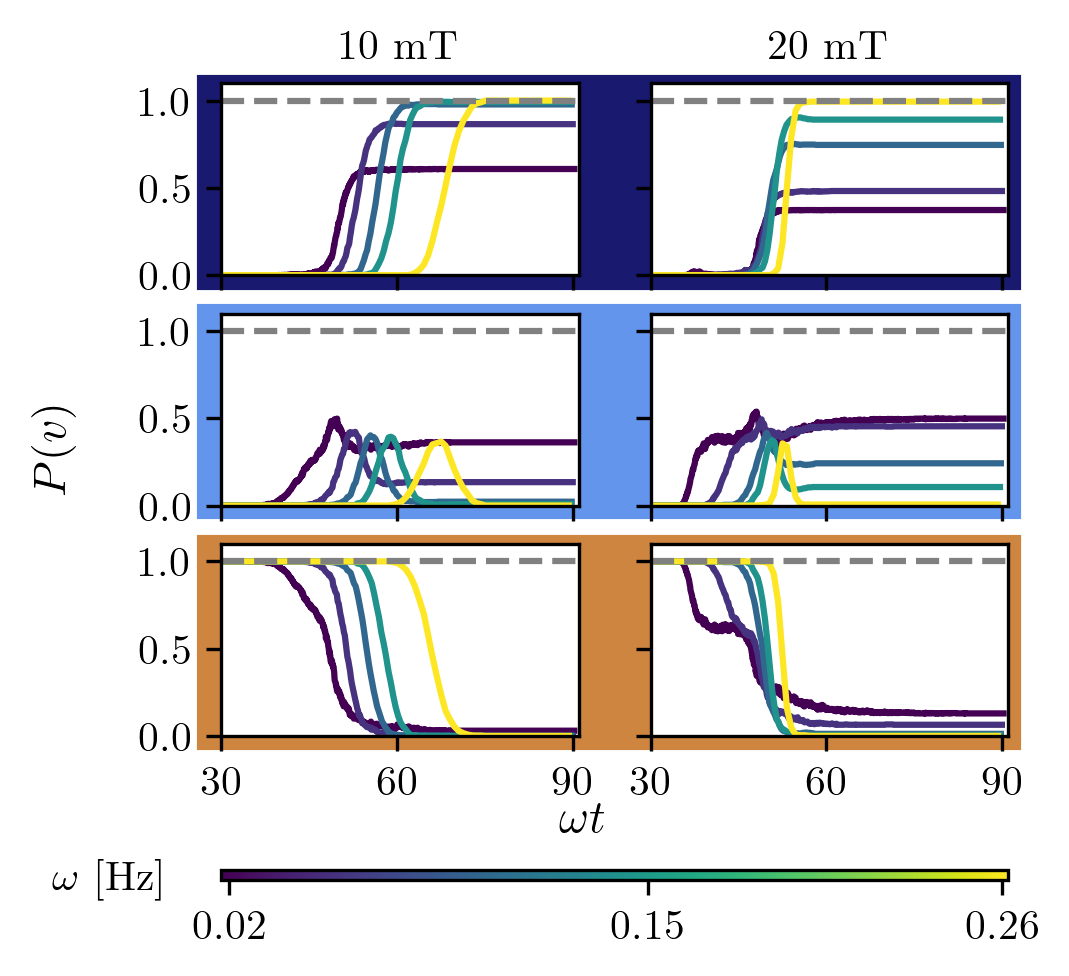

In [62]:
# the figure must be 245.52 total from 3.41 wide
# after saving it crops to 221.761
# so we need to add extra 23.759 pt to compensate, divided by 72
# 1pt = 1/72 in
# that is 0.32 in
COL = 246/72
OFFSET = (245.52-221.761)/72

fig, axes = plt.subplots(3, 2, figsize=(COL+OFFSET,3.2), dpi=300)
#fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0, hspace=0.1, wspace=0.2)

norm = plt.Normalize(min(ws),max(ws))
cmap = plt.get_cmap('viridis')

field_values = [10,20]

# ==========================================================================================================
# MAIN PLOTS
# ==========================================================================================================
 
# plotting the fields
for j,B in enumerate(field_values):
    # here j selects the column in which it is going to be plotted
    for i,(w,cdf_w) in enumerate(raw_data.groupby('omega')):
        if w in ws:
            cdf_wB = cdf_w.xs(B,level='field')
            
            axes[0][j].plot(cdf_wB.theta*180/np.pi,cdf_wB.I + cdf_wB.VI, color = cmap(norm(w)))
            axes[0][j].set_title(f'${B}$ mT',fontsize=10)
            
            axes[1][j].plot(cdf_wB.theta*180/np.pi,cdf_wB.II + cdf_wB.V, color = cmap(norm(w)))
            
            axes[2][j].plot(cdf_wB.theta*180/np.pi,cdf_wB.III + cdf_wB.IV, color = cmap(norm(w)))


# adjusting the ticks and axes
for i in range(3):
    for j in range(2):
        axes[i][j].set_xlim(30,91)
        axes[i][j].set_ylim(0,1.1)
        
        axes[i][j].set_xticks([30,60,90])
        axes[i][j].set_yticks([0,0.5,1])
        
        axes[i][j].axhline(1, color ='gray', linestyle='--')
        
        
        if i<2:
            axes[i][j].set_xticklabels([])
            
        if j>0:
            axes[i][j].set_yticklabels([])


# ==========================================================================================================
# COLORBAR
# ==========================================================================================================

# putting a colorbar
fig.text(0.5,0.1,'$\\omega t$', fontsize=11)
fig.text(0.05, 0.5, '$P(v)$', ha='center', va='center', rotation=90, fontsize=11)
           
fig.subplots_adjust(bottom=0.2)  # Adjust the bottom space to make room for the colorbar
fig.subplots_adjust(left=0.2)  # Adjust the bottom space to make room for the shared axis label

cbar_ax = fig.add_axes([0.2, 0.05, 0.7, 0.01])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array to the ScalarMappable

cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
#cbar.set_label(label='$\\omega$ [Hz]', fontsize=10)
cbar.ax.tick_params(labelsize=10)

custom_ticks = np.round(np.array([min(ws), (min(ws)+max(ws)/2) ,max(ws)]),2)
cbar.set_ticks(custom_ticks)
cbar.set_ticklabels(custom_ticks)

fig.text(0.1, 0.05, '$\\omega$ [Hz]', fontsize=10, ha='center', va='center')
# ==========================================================================================================
# BACKGROUND COLORBOXES
# ==========================================================================================================

# putting boxes around the rows
# Colors for each row
colors = ['#191970', '#6495ed', '#cd853f']

fig.add_artist(
    patches.Rectangle(
        (0.18, 2/3), 0.73, 0.22, color=colors[0], alpha=1, transform=fig.transFigure, zorder=0)
)

fig.add_artist(
    patches.Rectangle(
        (0.18, 0.428), 0.73, 0.22, color=colors[1], alpha=1, transform=fig.transFigure, zorder=0)
)


fig.add_artist(
    patches.Rectangle(
        (0.18, 0.187), 0.73, 0.22, color=colors[2], alpha=1, transform=fig.transFigure, zorder=0)
)

plt.show()

fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/fig2.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/fig2.png',dpi=300,bbox_inches='tight',pad_inches=0)


# Ignoring some computations

In [18]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_36565/2634913087.py:4: RuntimeWarning: invalid value encountered in arccos
  magic_angle = np.arccos(1/np.sqrt(3)/np.sin(theta)) * 180/np.pi


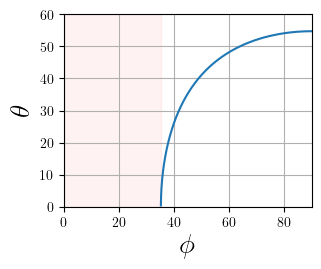

In [12]:
fig, ax =  plt.subplots(figsize=(3.2,2.5))

theta = np.arange(0.02,np.pi/2,0.0001)
magic_angle = np.arccos(1/np.sqrt(3)/np.sin(theta)) * 180/np.pi

ax.plot(theta * 180/np.pi, magic_angle)
ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\theta$')
ax.set_xlim(0,90)
ax.set_ylim(0,60)
ax.axvspan(0,35.2643,alpha=0.05, color='red')
plt.grid()
fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/magic_angle.pdf',dpi=300,bbox_inches='tight')
fig.savefig('/home/frieren/Dropbox/mnt/martensitepaper/magic_angle.png',dpi=300,bbox_inches='tight')